In [48]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline

# set up better resolution for figures
# matplotlib
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# seaborn
sb.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sb.set_context('notebook')
sb.set_style("ticks")

from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

# CCLE

In [1]:
# check final output files
!ls ../output_raw

1_RefDNN_CCLE.csv              2_lococv_randomforest_CCLE.csv
1_RefDNN_CCLE_test.csv         2_lococv_randomforest_GDSC.csv
1_RefDNN_GDSC.csv              3_lodocv_RefDNN_CCLE.csv
1_elasticnet_CCLE.csv          3_lodocv_RefDNN_GDSC.csv
1_elasticnet_GDSC.csv          3_lodocv_elasticnet_CCLE.csv
1_randomforest_CCLE.csv        3_lodocv_elasticnet_GDSC.csv
1_randomforest_GDSC.csv        3_lodocv_randomforest_CCLE.csv
2_lococv_RefDNN_CCLE.csv       3_lodocv_randomforest_GDSC.csv
2_lococv_RefDNN_GDSC.csv       4_biomarker_CCLE.csv
2_lococv_elasticnet_CCLE.csv   4_biomarker_GDSC.csv
2_lococv_elasticnet_GDSC.csv


In [3]:
CCLE_RefDNN_LOCOCV = pd.read_csv("../output_raw/2_lococv_RefDNN_CCLE.csv", index_col=[0])
CCLE_RefDNN_LOCOCV

CANCERTYPE  Train_size  Test_size  Accuracy  Precision    Recall        F1  \
0        BLCA        5557        167  0.922156   0.900901  0.980392  0.938967   
1        BRCA        5380        344  0.875000   0.906542  0.894009  0.900232   
2        CHOL        5712         12  1.000000   1.000000  1.000000  1.000000   
3    COADREAD        5466        258  0.872093   0.872483  0.902778  0.887372   
4        DLBC        5580        144  0.881944   0.872340  0.942529  0.906077   
5        ESCA        5565        159  0.886792   0.866667  0.928571  0.896552   
6         GBM        5479        245  0.971429   0.987500  0.969325  0.978328   
7        HNSC        5645         79  0.898734   0.843137  1.000000  0.914894   
8        KIRC        5643         81  0.925926   0.962963  0.928571  0.945455   
9        LAML        5628         96  0.812500   0.782609  0.818182  0.800000   
10        LGG        5678         46  0.956522   0.935484  1.000000  0.966667   
11       LIHC        5530        194  0.907216   0.927419  0.927419  0.927419   
12       LUAD        5192        532  0.887218   0.869822  0.948387  0.907407   
13       LUSC        5542        182  0.917582   0.914530  0.955357  0.934498   
14       MESO        5640         84  0.940476   0.928571  0.981132  0.954128   
15         OV        5441        283  0.954064   0.978142  0.952128  0.964960   
16       PAAD        5424        300  0.923333   0.900585  0.962500  0.930514   
17       PRAD        5688         36  1.000000   1.000000  1.000000  1.000000   
18       SKCM        5305        419  0.844869   0.794776  0.955157  0.867617   
19       STAD        5510        214  0.878505   0.907563  0.878049  0.892562   
20       THCA        5664         60  0.883333   0.825000  1.000000  0.904110   
21       UCEC        5504        220  0.936364   0.963235  0.935714  0.949275   
22     others        4155       1569  0.901211   0.889332  0.952991  0.920062   

      AUCROC     AUCPR  Hidden_units  Learning_rate_ftrl  Learning_rate_adam  \
0   0.950226  0.961710           128                 0.1             0.01453   
1   0.904677  0.926580           128                 0.1             0.01453   
2   1.000000  1.000000           128                 0.1             0.01453   
3   0.923733  0.932423           128                 0.1             0.01453   
4   0.914096  0.908256           128                 0.1             0.01453   
5   0.917937  0.898659           128                 0.1             0.01453   
6   0.994239  0.997252           128                 0.1             0.01453   
7   0.967700  0.967092           128                 0.1             0.01453   
8   0.962857  0.982899           128                 0.1             0.01453   
9   0.928759  0.913058           128                 0.1             0.01453   
10  0.949290  0.940977           128                 0.1             0.01453   
11  0.964055  0.980543           128                 0.1             0.01453   
12  0.925240  0.909468           128                 0.1             0.01453   
13  0.949362  0.948552           128                 0.1             0.01453   
14  0.928180  0.926849           128                 0.1             0.01453   
15  0.973124  0.981771           128                 0.1             0.01453   
16  0.956875  0.936757           128                 0.1             0.01453   
17  1.000000  1.000000           128                 0.1             0.01453   
18  0.963256  0.962938           128                 0.1             0.01453   
19  0.926025  0.928556           128                 0.1             0.01453   
20  0.966330  0.954054           128                 0.1             0.01453   
21  0.959196  0.974269           128                 0.1             0.01453   
22  0.926728  0.931489           128                 0.1             0.01453   

    L1_regularization_strength  L2_regularization_strength  
0                        100.0                       0.001  
1              

In [4]:
CCLE_elasticnet_LOCOCV = pd.read_csv("../output_raw/2_lococv_elasticnet_CCLE.csv", index_col=[0])
CCLE_elasticnet_LOCOCV

CANCERTYPE  Train_size  Test_size  Accuracy  Precision  Recall        F1  \
0        BLCA        5557        167  0.610778   0.610778     1.0  0.758364   
1        BRCA        5380        344  0.630814   0.630814     1.0  0.773619   
2        CHOL        5712         12  0.583333   0.583333     1.0  0.736842   
3    COADREAD        5466        258  0.558140   0.558140     1.0  0.716418   
4        DLBC        5580        144  0.604167   0.604167     1.0  0.753247   
5        ESCA        5565        159  0.528302   0.528302     1.0  0.691358   
6         GBM        5479        245  0.665306   0.665306     1.0  0.799020   
7        HNSC        5645         79  0.544304   0.544304     1.0  0.704918   
8        KIRC        5643         81  0.691358   0.691358     1.0  0.817518   
9        LAML        5628         96  0.458333   0.458333     1.0  0.628571   
10        LGG        5678         46  0.630435   0.630435     1.0  0.773333   
11       LIHC        5530        194  0.639175   0.639175     1.0  0.779874   
12       LUAD        5192        532  0.582707   0.582707     1.0  0.736342   
13       LUSC        5542        182  0.615385   0.615385     1.0  0.761905   
14       MESO        5640         84  0.630952   0.630952     1.0  0.773723   
15         OV        5441        283  0.664311   0.664311     1.0  0.798301   
16       PAAD        5424        300  0.533333   0.533333     1.0  0.695652   
17       PRAD        5688         36  0.666667   0.666667     1.0  0.800000   
18       SKCM        5305        419  0.532220   0.532220     1.0  0.694704   
19       STAD        5510        214  0.574766   0.574766     1.0  0.729970   
20       THCA        5664         60  0.550000   0.550000     1.0  0.709677   
21       UCEC        5504        220  0.636364   0.636364     1.0  0.777778   
22     others        4155       1569  0.596558   0.596558     1.0  0.747305   

      AUCROC     AUCPR  ALPHA  L1_RATIO      ETA0  
0   0.533409  0.619915    0.1  0.607952  0.000391  
1   0.488497  0.642015    0.1  0.607952  0.000391  
2   0.500000  0.583333    0.1  0.607952  0.000391  
3   0.579617  0.642785    0.1  0.607952  0.000391  
4   0.561706  0.646211    0.1  0.607952  0.000391  
5   0.532143  0.572773    0.1  0.607952  0.000391  
6   0.530263  0.688608    0.1  0.607952  0.000391  
7   0.528424  0.585285    0.1  0.607952  0.000391  
8   0.545357  0.727368    0.1  0.607952  0.000391  
9   0.500000  0.458333    0.1  0.607952  0.000391  
10  0.538540  0.652465    0.1  0.607952  0.000391  
11  0.590553  0.688853    0.1  0.607952  0.000391  
12  0.546062  0.618772    0.1  0.607952  0.000391  
13  0.557653  0.664569    0.1  0.607952  0.000391  
14  0.492696  0.631611    0.1  0.607952  0.000391  
15  0.523264  0.667612    0.1  0.607952  0.000391  
16  0.525513  0.555958    0.1  0.607952  0.000391  
17  0.500000  0.666667    0.1  0.607952  0.000391  
18  0.495516  0.524974    0.1  0.607952  0.000391  
19  0.569508  0.633576    0.1  0.607952  0.000391  
20  0.486532  0.555471    0.1  0.607952  0.000391  
21  0.533929  0.659460    0.1  0.607952  0.000391  
22  0.504308  0.591175    0.1  0.607952  0.000391

In [5]:
CCLE_randomforest_LOCOCV = pd.read_csv("../output_raw/2_lococv_randomforest_CCLE.csv", index_col=[0])
CCLE_randomforest_LOCOCV

CANCERTYPE  Train_size  Test_size  Accuracy  Precision  Recall        F1  \
0        BLCA        5557        167  0.610778   0.610778     1.0  0.758364   
1        BRCA        5380        344  0.630814   0.630814     1.0  0.773619   
2        CHOL        5712         12  0.583333   0.583333     1.0  0.736842   
3    COADREAD        5466        258  0.558140   0.558140     1.0  0.716418   
4        DLBC        5580        144  0.604167   0.604167     1.0  0.753247   
5        ESCA        5565        159  0.528302   0.528302     1.0  0.691358   
6         GBM        5479        245  0.665306   0.665306     1.0  0.799020   
7        HNSC        5645         79  0.544304   0.544304     1.0  0.704918   
8        KIRC        5643         81  0.691358   0.691358     1.0  0.817518   
9        LAML        5628         96  0.458333   0.458333     1.0  0.628571   
10        LGG        5678         46  0.630435   0.630435     1.0  0.773333   
11       LIHC        5530        194  0.639175   0.639175     1.0  0.779874   
12       LUAD        5192        532  0.582707   0.582707     1.0  0.736342   
13       LUSC        5542        182  0.615385   0.615385     1.0  0.761905   
14       MESO        5640         84  0.630952   0.630952     1.0  0.773723   
15         OV        5441        283  0.664311   0.664311     1.0  0.798301   
16       PAAD        5424        300  0.533333   0.533333     1.0  0.695652   
17       PRAD        5688         36  0.666667   0.666667     1.0  0.800000   
18       SKCM        5305        419  0.532220   0.532220     1.0  0.694704   
19       STAD        5510        214  0.574766   0.574766     1.0  0.729970   
20       THCA        5664         60  0.550000   0.550000     1.0  0.709677   
21       UCEC        5504        220  0.636364   0.636364     1.0  0.777778   
22     others        4155       1569  0.596558   0.596558     1.0  0.747305   

      AUCROC     AUCPR  N_ESTIMTORS  MAX_DEPTH  
0   0.547587  0.643247           53          3  
1   0.516147  0.638685           53          3  
2   0.500000  0.583333           53          3  
3   0.567434  0.614216           53          3  
4   0.532668  0.656208           53          3  
5   0.482619  0.515779           53          3  
6   0.524054  0.675000           53          3  
7   0.564599  0.590344           53          3  
8   0.539643  0.701023           53          3  
9   0.520979  0.472768           53          3  
10  0.485801  0.622687           53          3  
11  0.570507  0.672047           53          3  
12  0.518628  0.599565           53          3  
13  0.541837  0.657852           53          3  
14  0.514607  0.643553           53          3  
15  0.502884  0.668924           53          3  
16  0.519754  0.557352           53          3  
17  0.500000  0.666667           53          3  
18  0.498193  0.541200           53          3  
19  0.571652  0.617703           53          3  
20  0.540404  0.563131           53          3  
21  0.525357  0.654051           53          3  
22  0.526015  0.615725           53          3

In [6]:
# Why both Elastic Net and Random Forest have Recall=1?
# Why both Elastic Net and Random Forest have same values of accuracy, precision, recall, f1???

In [7]:
# make the data tidy for visualization
CCLE_RefDNN_metrics = CCLE_RefDNN_LOCOCV[['CANCERTYPE', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUCROC', 'AUCPR']]
CCLE_RefDNN_metrics_tidy = pd.melt(CCLE_RefDNN_metrics, id_vars=['CANCERTYPE'], value_vars=list(CCLE_RefDNN_metrics)[1:], var_name='metric', value_name='value')
CCLE_RefDNN_metrics_tidy['model'] = 'RefDNN'

CCLE_elasticnet_metrics = CCLE_elasticnet_LOCOCV[['CANCERTYPE', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUCROC', 'AUCPR']]
CCLE_elasticnet_metrics_tidy = pd.melt(CCLE_elasticnet_metrics, id_vars=['CANCERTYPE'], value_vars=list(CCLE_elasticnet_metrics)[1:], var_name='metric', value_name='value')
CCLE_elasticnet_metrics_tidy['model'] = 'Elastic Net'

CCLE_randomforest_metrics = CCLE_randomforest_LOCOCV[['CANCERTYPE', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUCROC', 'AUCPR']]
CCLE_randomforest_metrics_tidy = pd.melt(CCLE_randomforest_metrics, id_vars=['CANCERTYPE'], value_vars=list(CCLE_randomforest_metrics)[1:], var_name='metric', value_name='value')
CCLE_randomforest_metrics_tidy['model'] = 'Random Forest'

CCLE_metrics_tidy = pd.concat([CCLE_RefDNN_metrics_tidy, CCLE_elasticnet_metrics_tidy, CCLE_randomforest_metrics_tidy], ignore_index=True)

CCLE_metrics_tidy = CCLE_metrics_tidy[CCLE_metrics_tidy['value'] > 0]
CCLE_metrics_tidy = CCLE_metrics_tidy[CCLE_metrics_tidy['CANCERTYPE'] != 'others']
CCLE_metrics_tidy = CCLE_metrics_tidy.reset_index(drop=True)
CCLE_metrics_tidy

CANCERTYPE    metric     value          model
0         BLCA  Accuracy  0.922156         RefDNN
1         BRCA  Accuracy  0.875000         RefDNN
2         CHOL  Accuracy  1.000000         RefDNN
3     COADREAD  Accuracy  0.872093         RefDNN
4         DLBC  Accuracy  0.881944         RefDNN
..         ...       ...       ...            ...
391       PRAD     AUCPR  0.666667  Random Forest
392       SKCM     AUCPR  0.541200  Random Forest
393       STAD     AUCPR  0.617703  Random Forest
394       THCA     AUCPR  0.563131  Random Forest
395       UCEC     AUCPR  0.654051  Random Forest

[396 rows x 4 columns]

In [8]:
models = ['RefDNN', 'Random Forest', 'Elastic Net']
metrics = ['Accuracy', 'AUCROC', 'Precision', 'Recall', 'F1', 'AUCPR']
CCLE_metrics_tidy['model'] = pd.Categorical(CCLE_metrics_tidy['model'],
                                   categories=models,
                                   ordered=True)

In [28]:
def plot_data(metric, dataset='GDSC'):
    if dataset=='CCLE':
        data_tidy = CCLE_metrics_tidy
    if dataset=='GDSC':
        data_tidy = GDSC_metrics_tidy
    data = data_tidy[data_tidy['metric']==metric].drop(columns='metric').reset_index(drop=True)
    sb.lineplot(data=data, x='model', y='value', hue='CANCERTYPE', legend=False, alpha = 0.5, palette={sb.color_palette("Greys")[1]}); #
    sb.boxplot(data=data, x='model', y='value',  boxprops=dict(alpha=1));
    sb.stripplot(data=data, x='model', y='value', color = 'black', alpha = 0.5, jitter=False)
    plt.xlabel('')
    plt.ylabel(f'{metric} of LOCOCV on {dataset} data');

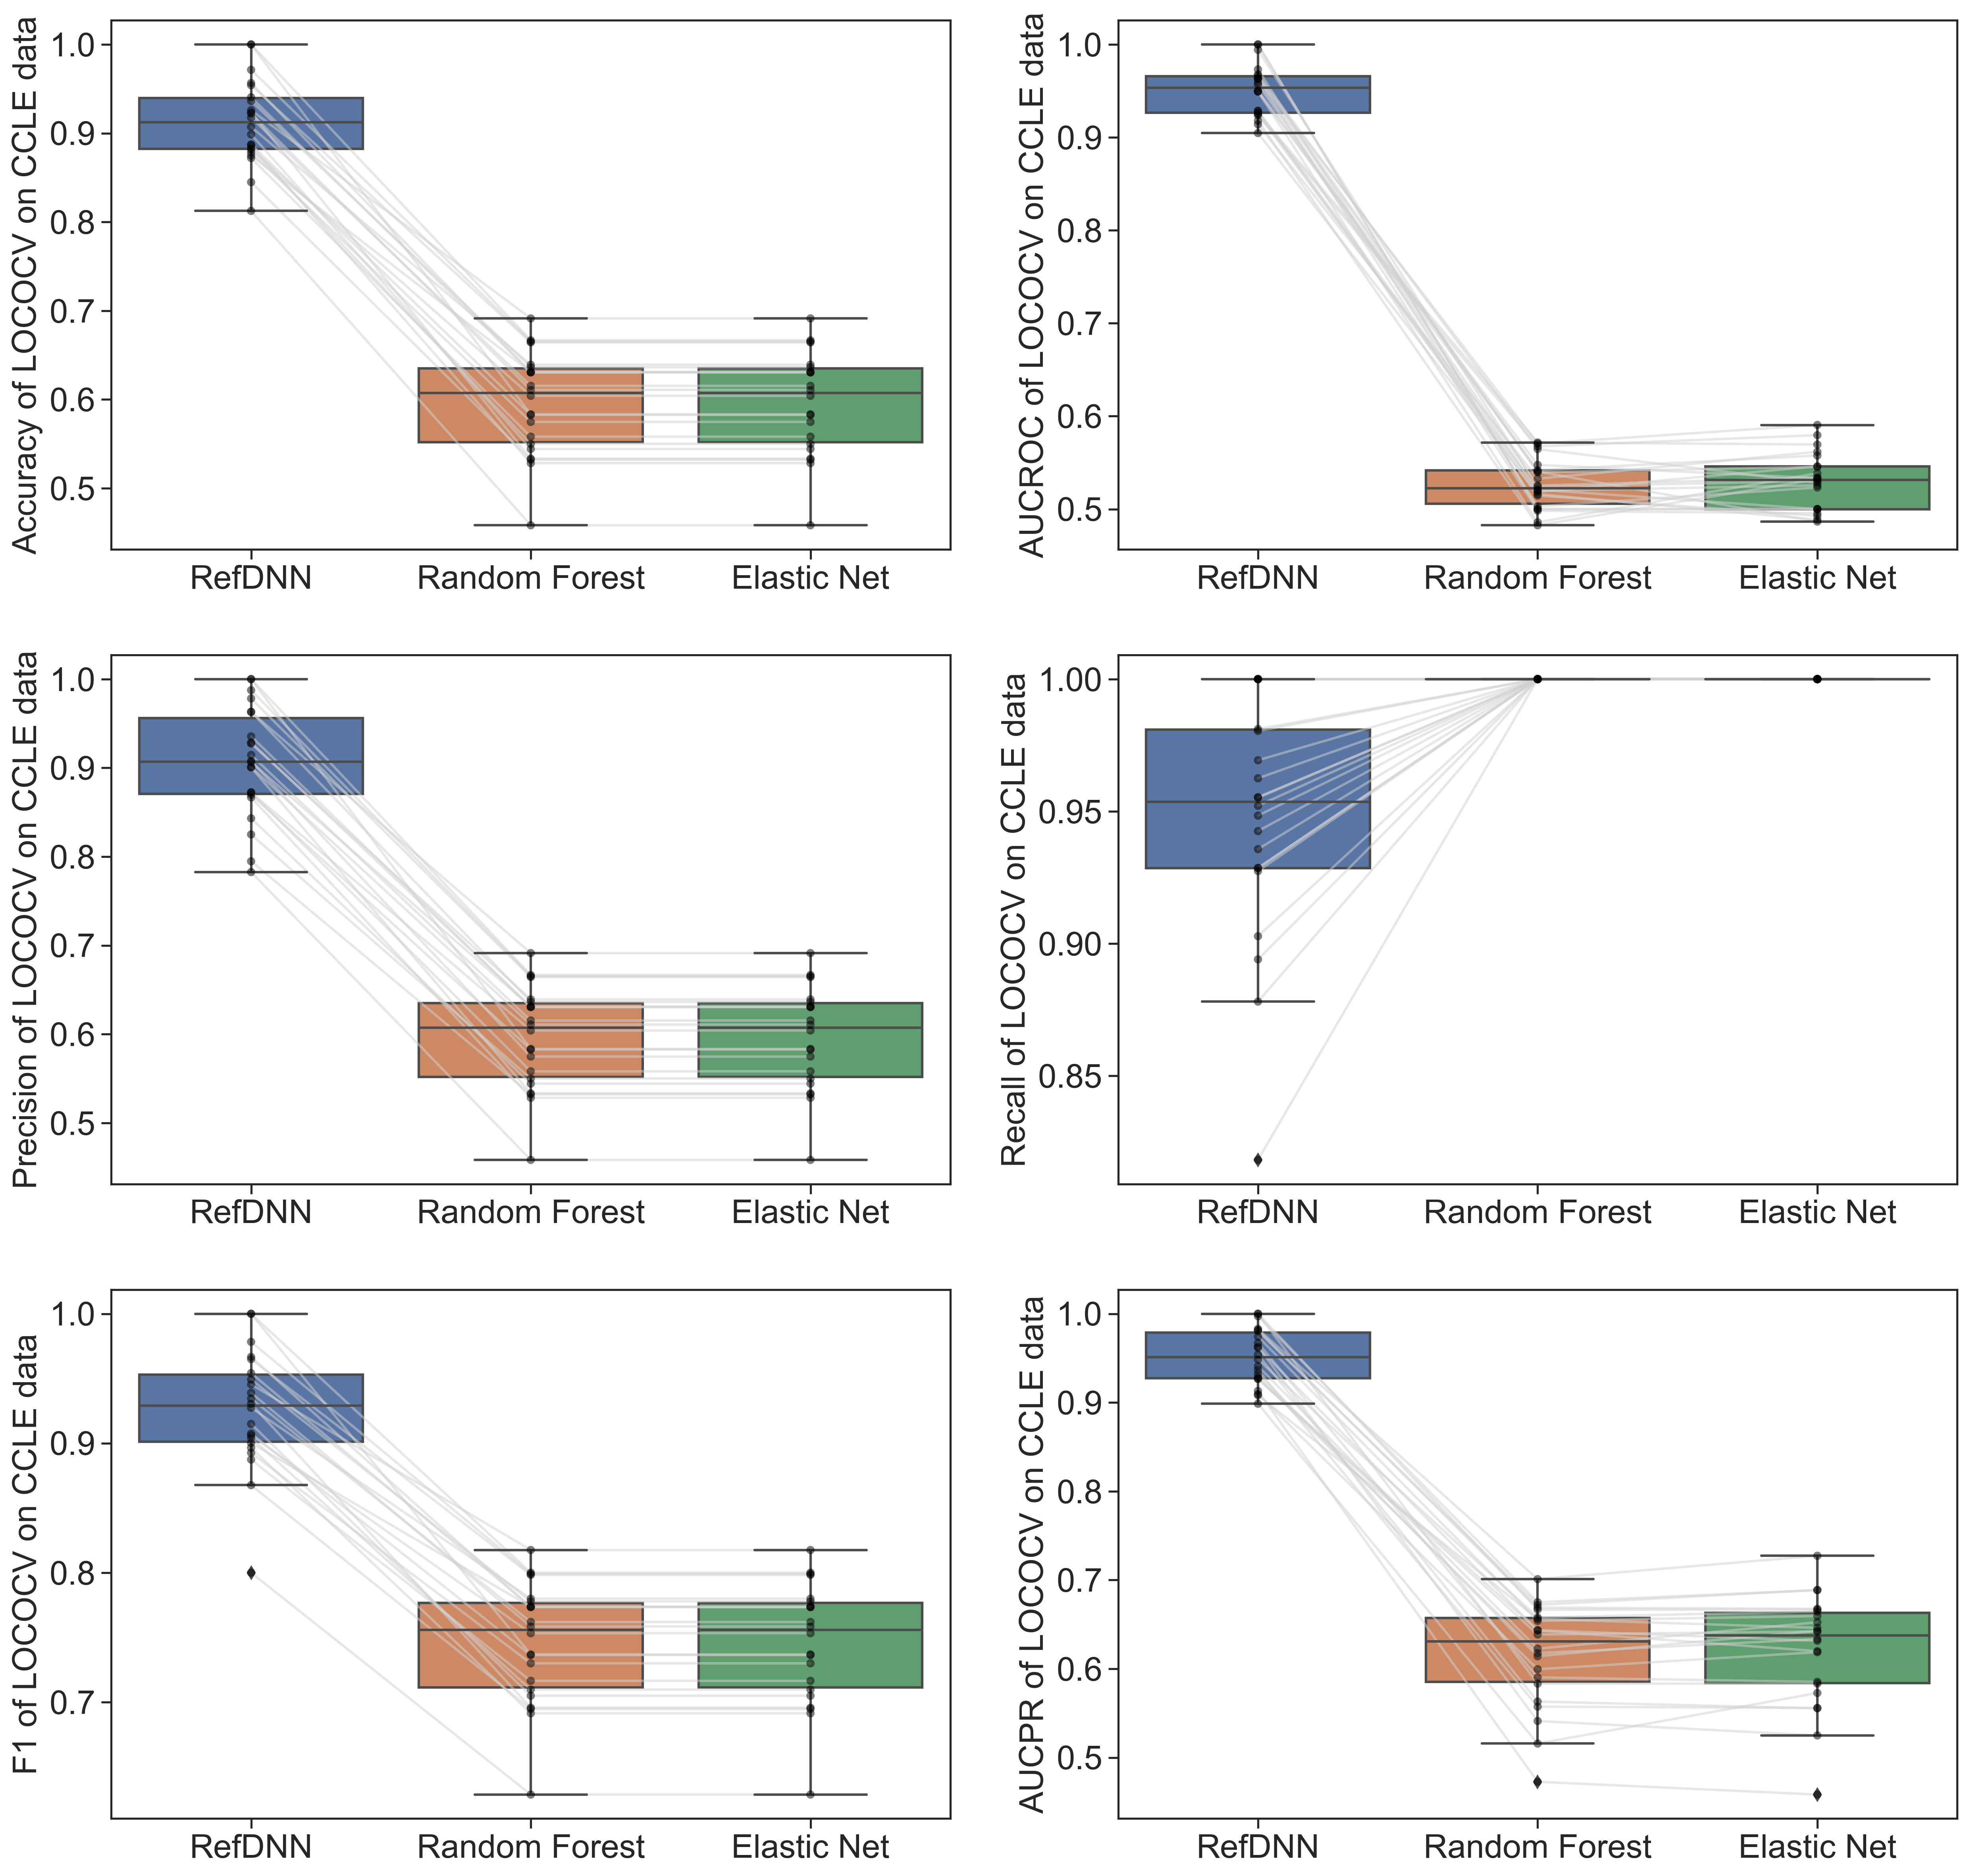

In [87]:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': False,
   'figure.figsize': [20,20]
   }
rcParams.update(params)

for i, metric in enumerate(metrics):
    plt.subplot(3,2,i+1)
    plot_data(metric, 'CCLE')

### Statistical test

In [10]:
p_values_df_CCLE = pd.DataFrame()
p_values_df_CCLE['metric'] = metrics
p_values_rf, p_values_en = [], []

for metric in metrics:
    refDNN_values = list(CCLE_metrics_tidy[(CCLE_metrics_tidy['metric']==metric) & (CCLE_metrics_tidy['model']=='RefDNN')]['value'])
    rf_values = list(CCLE_metrics_tidy[(CCLE_metrics_tidy['metric']==metric) & (CCLE_metrics_tidy['model']=='Random Forest')]['value'])
    en_values = list(CCLE_metrics_tidy[(CCLE_metrics_tidy['metric']==metric) & (CCLE_metrics_tidy['model']=='Elastic Net')]['value'])
    p_values_rf.append(stats.wilcoxon(refDNN_values, rf_values, mode='approx')[1])
    p_values_en.append(stats.wilcoxon(refDNN_values, en_values, mode='approx')[1])
    
p_values_df_CCLE['Random Forest'] = p_values_rf
p_values_df_CCLE['Elastic Net'] = p_values_en
p_values_df_CCLE

metric  Random Forest  Elastic Net
0   Accuracy       0.000040     0.000040
1     AUCROC       0.000040     0.000040
2  Precision       0.000040     0.000040
3     Recall       0.000292     0.000292
4         F1       0.000040     0.000040
5      AUCPR       0.000040     0.000040

In [11]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(list(p_values_df_CCLE['Random Forest']) + list(p_values_df_CCLE['Elastic Net']), 
                           alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
p_values_df_CCLE['Random Forest adjusted'] = p_adjusted[1][0:6]
p_values_df_CCLE['Elastic Net adjusted'] = p_adjusted[1][6:]
p_values_df_CCLE

metric  Random Forest  Elastic Net  Random Forest adjusted  \
0   Accuracy       0.000040     0.000040                0.000481   
1     AUCROC       0.000040     0.000040                0.000481   
2  Precision       0.000040     0.000040                0.000481   
3     Recall       0.000292     0.000292                0.003510   
4         F1       0.000040     0.000040                0.000481   
5      AUCPR       0.000040     0.000040                0.000481   

   Elastic Net adjusted  
0              0.000481  
1              0.000481  
2              0.000481  
3              0.003510  
4              0.000481  
5              0.000481

In [12]:
p_values_df_CCLE['Random Forest Labels'] = p_values_df_CCLE['Random Forest adjusted'].apply(lambda p: '**' if p<0.01 else('*' if p<0.05 else 'ns'))
p_values_df_CCLE['Elastic Net Labels'] = p_values_df_CCLE['Elastic Net adjusted'].apply(lambda p: '**' if p<0.01 else('*' if p<0.05 else 'ns'))
p_values_df_CCLE

metric  Random Forest  Elastic Net  Random Forest adjusted  \
0   Accuracy       0.000040     0.000040                0.000481   
1     AUCROC       0.000040     0.000040                0.000481   
2  Precision       0.000040     0.000040                0.000481   
3     Recall       0.000292     0.000292                0.003510   
4         F1       0.000040     0.000040                0.000481   
5      AUCPR       0.000040     0.000040                0.000481   

   Elastic Net adjusted Random Forest Labels Elastic Net Labels  
0              0.000481                   **                 **  
1              0.000481                   **                 **  
2              0.000481                   **                 **  
3              0.003510                   **                 **  
4              0.000481                   **                 **  
5              0.000481                   **                 **

## GDSC

In [13]:
GDSC_RefDNN_LOCOCV = pd.read_csv("../output_raw/2_lococv_RefDNN_GDSC.csv", index_col=[0])
GDSC_RefDNN_LOCOCV

CANCERTYPE  Train_size  Test_size  Accuracy  Precision    Recall        F1  \
0         ACC      189846        190  0.805263   0.888889  0.829630  0.858238   
1         ALL      184858       5178  0.776748   0.752377  0.796617  0.773865   
2        BLCA      186481       3555  0.827848   0.855705  0.883882  0.869565   
3        BRCA      180641       9395  0.829484   0.850964  0.915904  0.882241   
4        CESC      187557       2479  0.835014   0.867612  0.888082  0.877728   
5         CLL      189404        632  0.726266   0.880814  0.696552  0.777920   
6   COAD/READ      181093       8943  0.786425   0.852301  0.834011  0.843057   
7        DLBC      183579       6457  0.774044   0.760300  0.834655  0.795744   
8        ESCA      183372       6664  0.806273   0.836543  0.875429  0.855544   
9         GBM      183034       7002  0.832619   0.859395  0.890462  0.874652   
10       HNSC      182324       7712  0.821058   0.853018  0.866311  0.859613   
11       KIRC      184429       5607  0.799001   0.843750  0.849057  0.846395   
12       LAML      184106       5930  0.778921   0.824670  0.712228  0.764336   
13       LCML      187847       2189  0.806304   0.783962  0.809942  0.796740   
14        LGG      186426       3610  0.829917   0.864400  0.876170  0.870245   
15       LIHC      186930       3106  0.786220   0.854054  0.800405  0.826360   
16       LUAD      178277      11759  0.821754   0.839583  0.913081  0.874791   
17       LUSC      187244       2792  0.829513   0.834300  0.928495  0.878880   
18         MB      189223        813  0.813038   0.883673  0.820076  0.850688   
19       MESO      186337       3699  0.816167   0.912029  0.827394  0.867653   
20         MM      186497       3539  0.798813   0.816478  0.829574  0.822974   
21         NB      183749       6287  0.786226   0.823358  0.846748  0.834889   
22         OV      184575       5461  0.824391   0.851794  0.895494  0.873098   
23       PAAD      184554       5482  0.837286   0.869044  0.885928  0.877405   
24       PRAD      188941       1095  0.804566   0.812958  0.915978  0.861399   
25       SCLC      178528      11508  0.807091   0.848747  0.883138  0.865601   
26       SKCM      180006      10030  0.805882   0.833283  0.866267  0.849455   
27       STAD      186019       4017  0.805576   0.820151  0.902384  0.859305   
28       THCA      187176       2860  0.820979   0.822322  0.912778  0.865192   
29       UCEC      188268       1768  0.830317   0.864078  0.890000  0.876847   
30     others      149759      40277  0.795814   0.822108  0.846984  0.834361   

      AUCROC     AUCPR  Hidden_units  Learning_rate_ftrl  Learning_rate_adam  \
0   0.874007  0.928898            49            0.000008            0.000407   
1   0.869405  0.865559            49            0.000008            0.000407   
2   0.899849  0.939747            49            0.000008            0.000407   
3   0.886909  0.945280            49            0.000008            0.000407   
4   0.906245  0.951008            49            0.000008            0.000407   
5   0.830714  0.908711            49            0.000008            0.000407   
6   0.862303  0.933044            49            0.000008            0.000407   
7   0.866729  0.879901            49            0.000008            0.000407   
8   0.872243  0.927356            49            0.000008            0.000407   
9   0.900979  0.942850            49            0.000008            0.000407   
10  0.890915  0.930311            49            0.000008            0.000407   
11  0.865112  0.919221            49            0.000008            0.000407   
12  0.863468  0.864569            49            0.000008            0.000407   
13  0.879135  0.843815            49            0.000008            0.000407   
14  0.895633  0.937164            49            0.000008            0.000407   
15  0.870989  0.923879            49            0.000008            0.000407   
16  0.883589  0.938441            49            0.

In [14]:
GDSC_elasticnet_LOCOCV = pd.read_csv("../output_raw/2_lococv_elasticnet_GDSC.csv", index_col=[0])
GDSC_elasticnet_LOCOCV

CANCERTYPE  Train_size  Test_size  Accuracy  Precision    Recall        F1  \
0         ACC      189846        190  0.710526   0.710526  1.000000  0.830769   
1         ALL      184858       5178  0.520471   0.000000  0.000000  0.000000   
2        BLCA      186481       3555  0.554993   0.699451  0.551560  0.616764   
3        BRCA      180641       9395  0.697392   0.697392  1.000000  0.821722   
4        CESC      187557       2479  0.666801   0.666801  1.000000  0.800097   
5         CLL      189404        632  0.688291   0.688291  1.000000  0.815370   
6   COAD/READ      181093       8943  0.569384   0.704263  0.644611  0.673118   
7        DLBC      183579       6457  0.527335   0.527335  1.000000  0.690529   
8        ESCA      183372       6664  0.543968   0.670344  0.598351  0.632305   
9         GBM      183034       7002  0.655813   0.655813  1.000000  0.792134   
10       HNSC      182324       7712  0.632391   0.632391  1.000000  0.774803   
11       KIRC      184429       5607  0.652220   0.652220  1.000000  0.789508   
12       LAML      184106       5930  0.493423   0.479744  0.075377  0.130284   
13       LCML      187847       2189  0.501599   0.483359  0.920078  0.633770   
14        LGG      186426       3610  0.650970   0.650970  1.000000  0.788591   
15       LIHC      186930       3106  0.380876   0.584158  0.089666  0.155468   
16       LUAD      178277      11759  0.681946   0.681946  1.000000  0.810901   
17       LUSC      187244       2792  0.666189   0.666189  1.000000  0.799656   
18         MB      189223        813  0.600246   0.675302  0.740530  0.706414   
19       MESO      186337       3699  0.728305   0.728305  1.000000  0.842797   
20         MM      186497       3539  0.551286   0.593306  0.648622  0.619732   
21         NB      183749       6287  0.400986   0.764454  0.088961  0.159375   
22         OV      184575       5461  0.674602   0.674602  1.000000  0.805686   
23       PAAD      184554       5482  0.657242   0.657242  1.000000  0.793176   
24       PRAD      188941       1095  0.663014   0.663014  1.000000  0.797364   
25       SCLC      178528      11508  0.703424   0.710484  0.976158  0.822397   
26       SKCM      180006      10030  0.632203   0.632203  1.000000  0.774663   
27       STAD      186019       4017  0.498631   0.702511  0.412788  0.520019   
28       THCA      187176       2860  0.370629   0.000000  0.000000  0.000000   
29       UCEC      188268       1768  0.678733   0.678733  1.000000  0.808625   
30     others      149759      40277  0.574124   0.636292  0.696994  0.665262   

      AUCROC     AUCPR     ALPHA  L1_RATIO      ETA0  
0   0.500000  0.710526  0.010197  0.439733  0.021812  
1   0.500635  0.475307  0.010197  0.439733  0.021812  
2   0.565495  0.687885  0.010197  0.439733  0.021812  
3   0.538763  0.725258  0.010197  0.439733  0.021812  
4   0.553225  0.693172  0.010197  0.439733  0.021812  
5   0.485623  0.677508  0.010197  0.439733  0.021812  
6   0.530628  0.699384  0.010197  0.439733  0.021812  
7   0.506961  0.526208  0.010197  0.439733  0.021812  
8   0.505064  0.656005  0.010197  0.439733  0.021812  
9   0.507850  0.649517  0.010197  0.439733  0.021812  
10  0.516307  0.648358  0.010197  0.439733  0.021812  
11  0.549522  0.683274  0.010197  0.439733  0.021812  
12  0.493042  0.500010  0.010197  0.439733  0.021812  
13  0.527160  0.484905  0.010197  0.439733  0.021812  
14  0.514737  0.664467  0.010197  0.439733  0.021812  
15  0.477205  0.612089  0.010197  0.439733  0.021812  
16  0.512142  0.683205  0.010197  0.439733  0.021812  
17  0.536448  0.696568  0.010197  0.439733  0.021812  
18  0.582320  0.712916  0.010197  0.439733  0.021812  
19  0.511743  0.731130  0.010197  0.439733  0.021812  
20  0.523284  0.590063  0.010197  0.439733  0.021812  
21  0.548495  0.678271  0.010197  0.439733  0.021812  
22  0.515565  0.685020  0.010197  0.439733  0.021812  
23  0.485303  0.655771  0.010197  0.439733  0.021812  
24  0.493079  0.661746  0.010197  0

In [15]:
GDSC_randomforest_LOCOCV = pd.read_csv("../output_raw/2_lococv_randomforest_GDSC.csv", index_col=[0])
GDSC_randomforest_LOCOCV

CANCERTYPE  Train_size  Test_size  Accuracy  Precision    Recall        F1  \
0         ACC      189846        190  0.710526   0.710526  1.000000  0.830769   
1         ALL      184858       5178  0.488606   0.480638  0.824809  0.607355   
2        BLCA      186481       3555  0.649226   0.649226  1.000000  0.787310   
3        BRCA      180641       9395  0.697392   0.697392  1.000000  0.821722   
4        CESC      187557       2479  0.666801   0.666801  1.000000  0.800097   
5         CLL      189404        632  0.688291   0.688291  1.000000  0.815370   
6   COAD/READ      181093       8943  0.687801   0.687801  1.000000  0.815026   
7        DLBC      183579       6457  0.527335   0.527335  1.000000  0.690529   
8        ESCA      183372       6664  0.655312   0.655312  1.000000  0.791769   
9         GBM      183034       7002  0.655813   0.655813  1.000000  0.792134   
10       HNSC      182324       7712  0.632391   0.632391  1.000000  0.774803   
11       KIRC      184429       5607  0.652220   0.652220  1.000000  0.789508   
12       LAML      184106       5930  0.494098   0.498340  0.754439  0.600213   
13       LCML      187847       2189  0.502513   0.480663  0.763158  0.589831   
14        LGG      186426       3610  0.650970   0.650970  1.000000  0.788591   
15       LIHC      186930       3106  0.635544   0.635544  1.000000  0.777165   
16       LUAD      178277      11759  0.681946   0.681946  1.000000  0.810901   
17       LUSC      187244       2792  0.666189   0.666189  1.000000  0.799656   
18         MB      189223        813  0.649446   0.649446  1.000000  0.787472   
19       MESO      186337       3699  0.728305   0.728305  1.000000  0.842797   
20         MM      186497       3539  0.563719   0.563719  1.000000  0.720997   
21         NB      183749       6287  0.638301   0.638301  1.000000  0.779223   
22         OV      184575       5461  0.674602   0.674602  1.000000  0.805686   
23       PAAD      184554       5482  0.657242   0.657242  1.000000  0.793176   
24       PRAD      188941       1095  0.663014   0.663014  1.000000  0.797364   
25       SCLC      178528      11508  0.703424   0.703424  1.000000  0.825894   
26       SKCM      180006      10030  0.632203   0.632203  1.000000  0.774663   
27       STAD      186019       4017  0.657954   0.657954  1.000000  0.793694   
28       THCA      187176       2860  0.629371   0.629371  1.000000  0.772532   
29       UCEC      188268       1768  0.678733   0.678733  1.000000  0.808625   
30     others      149759      40277  0.606997   0.609841  0.979186  0.751589   

      AUCROC     AUCPR  N_ESTIMTORS  MAX_DEPTH  
0   0.500000  0.710526           51          7  
1   0.542311  0.519180           51          7  
2   0.544850  0.689919           51          7  
3   0.504803  0.704420           51          7  
4   0.573402  0.711994           51          7  
5   0.447068  0.664307           51          7  
6   0.562186  0.719677           51          7  
7   0.517364  0.541285           51          7  
8   0.512132  0.672407           51          7  
9   0.526494  0.672200           51          7  
10  0.523200  0.658068           51          7  
11  0.558421  0.692891           51          7  
12  0.483819  0.494220           51          7  
13  0.529899  0.491287           51          7  
14  0.547981  0.673408           51          7  
15  0.478038  0.630430           51          7  
16  0.534312  0.716143           51          7  
17  0.537143  0.690835           51          7  
18  0.472804  0.625512           51          7  
19  0.543095  0.765188           51          7  
20  0.547538  0.597009           51          7  
21  0.515395  0.646978           51          7  
22  0.530595  0.699829           51          7  
23  0.513101  0.670776           51          7  
24  0.507555  0.665917           51          7  
25  0.569219  0.750031           51          7  
26  0.533913  0.662304           51          7  
27  0.528856  0.679217           51   

In [16]:
# make the data tidy for visualization
GDSC_RefDNN_metrics = GDSC_RefDNN_LOCOCV[['CANCERTYPE', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUCROC', 'AUCPR']]
GDSC_RefDNN_metrics_tidy = pd.melt(GDSC_RefDNN_metrics, id_vars=['CANCERTYPE'], value_vars=list(GDSC_RefDNN_metrics)[1:], var_name='metric', value_name='value')
GDSC_RefDNN_metrics_tidy['model'] = 'RefDNN'

GDSC_elasticnet_metrics = GDSC_elasticnet_LOCOCV[['CANCERTYPE', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUCROC', 'AUCPR']]
GDSC_elasticnet_metrics_tidy = pd.melt(GDSC_elasticnet_metrics, id_vars=['CANCERTYPE'], value_vars=list(GDSC_elasticnet_metrics)[1:], var_name='metric', value_name='value')
GDSC_elasticnet_metrics_tidy['model'] = 'Elastic Net'

GDSC_randomforest_metrics = GDSC_randomforest_LOCOCV[['CANCERTYPE', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUCROC', 'AUCPR']]
GDSC_randomforest_metrics_tidy = pd.melt(GDSC_randomforest_metrics, id_vars=['CANCERTYPE'], value_vars=list(GDSC_randomforest_metrics)[1:], var_name='metric', value_name='value')
GDSC_randomforest_metrics_tidy['model'] = 'Random Forest'

GDSC_metrics_tidy = pd.concat([GDSC_RefDNN_metrics_tidy, GDSC_elasticnet_metrics_tidy, GDSC_randomforest_metrics_tidy], ignore_index=True)

GDSC_metrics_tidy = GDSC_metrics_tidy[GDSC_metrics_tidy['value'] > 0]
GDSC_metrics_tidy = GDSC_metrics_tidy[GDSC_metrics_tidy['CANCERTYPE'] != 'others']
GDSC_metrics_tidy = GDSC_metrics_tidy.reset_index(drop=True)
GDSC_metrics_tidy

CANCERTYPE    metric     value          model
0          ACC  Accuracy  0.805263         RefDNN
1          ALL  Accuracy  0.776748         RefDNN
2         BLCA  Accuracy  0.827848         RefDNN
3         BRCA  Accuracy  0.829484         RefDNN
4         CESC  Accuracy  0.835014         RefDNN
..         ...       ...       ...            ...
529       SCLC     AUCPR  0.750031  Random Forest
530       SKCM     AUCPR  0.662304  Random Forest
531       STAD     AUCPR  0.679217  Random Forest
532       THCA     AUCPR  0.720801  Random Forest
533       UCEC     AUCPR  0.722325  Random Forest

[534 rows x 4 columns]

In [17]:
models = ['RefDNN', 'Random Forest', 'Elastic Net']
GDSC_metrics_tidy['model'] = pd.Categorical(GDSC_metrics_tidy['model'],
                                   categories=models,
                                   ordered=True)

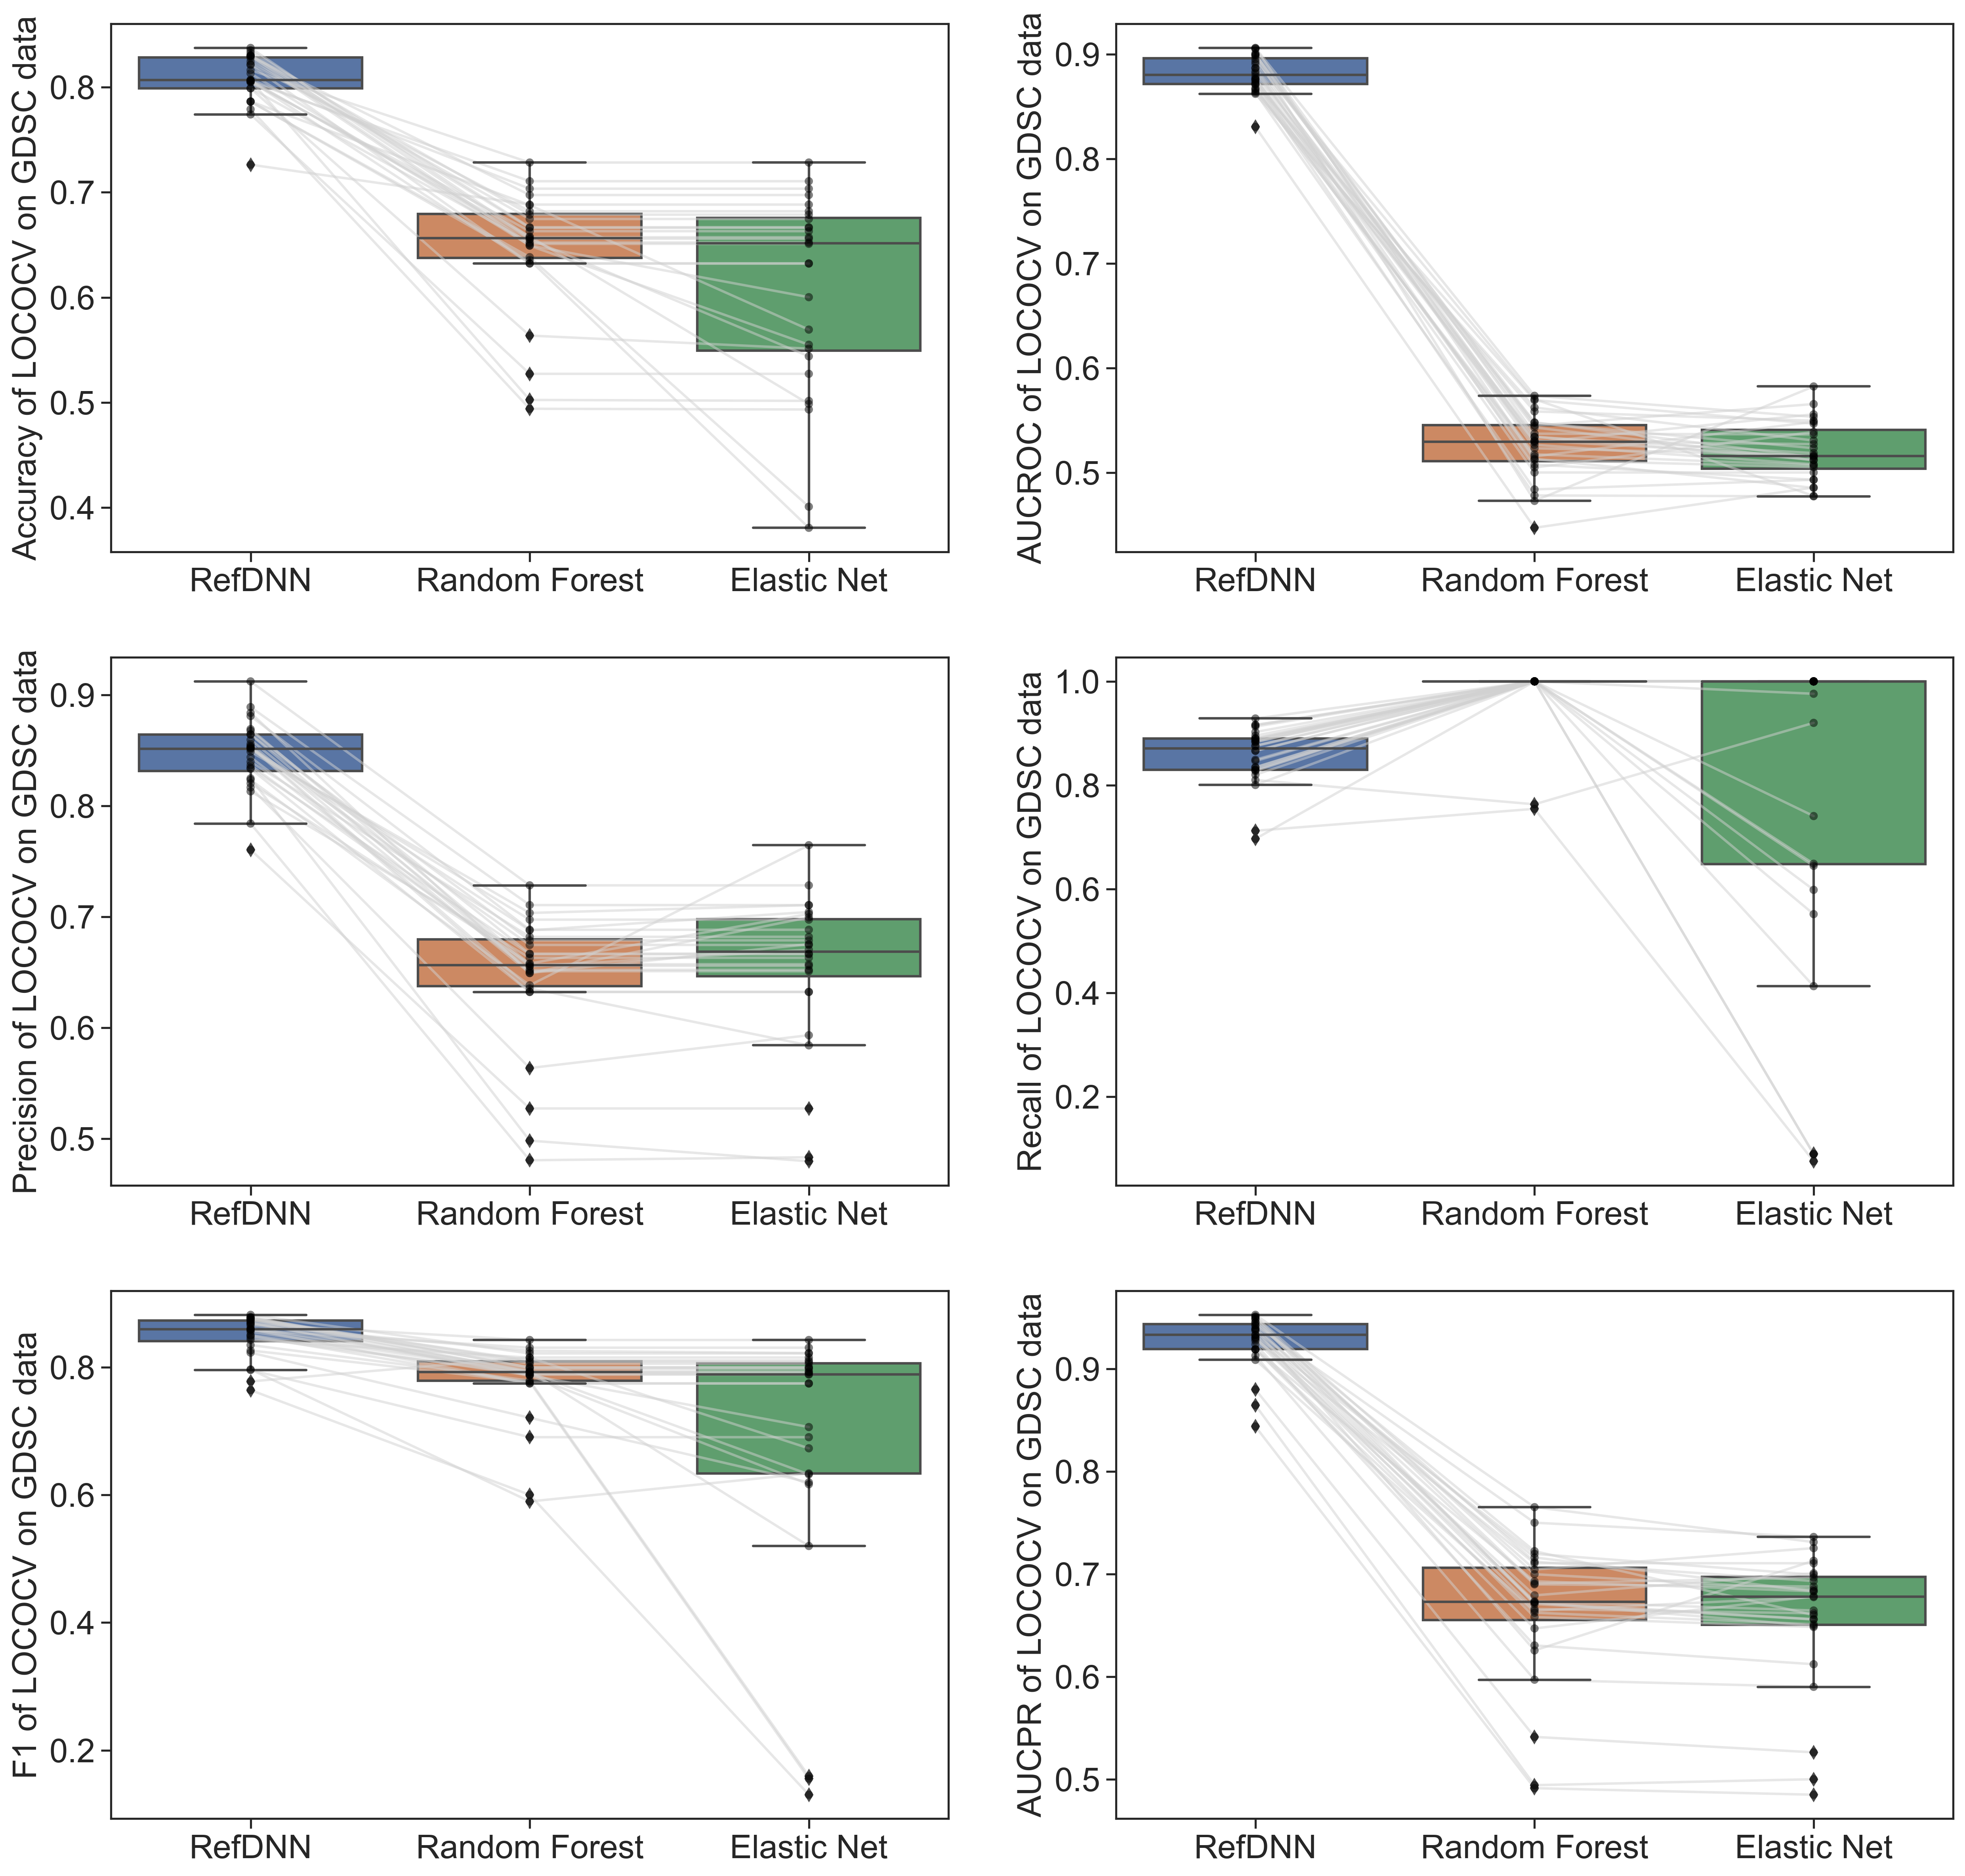

In [86]:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': False,
   'figure.figsize': [20,20]
   }
rcParams.update(params)

for i, metric in enumerate(metrics):
    plt.subplot(3,2,i+1)
    plot_data(metric, 'GDSC')

### Statistical test

In [25]:
p_values_df_GDSC = pd.DataFrame()
p_values_df_GDSC['metric'] = metrics
p_values_rf, p_values_en = [], []

# remove THCA here because it has some 0 values in some metrics, causing problem with the paired Wilcoxon test
GDSC_metrics_tidy = GDSC_metrics_tidy[~GDSC_metrics_tidy['CANCERTYPE'].isin(['THCA', 'ALL'])]

for metric in metrics:
    refDNN_values = list(GDSC_metrics_tidy[(GDSC_metrics_tidy['metric']==metric) & (GDSC_metrics_tidy['model']=='RefDNN')]['value'])
    rf_values = list(GDSC_metrics_tidy[(GDSC_metrics_tidy['metric']==metric) & (GDSC_metrics_tidy['model']=='Random Forest')]['value'])
    en_values = list(GDSC_metrics_tidy[(GDSC_metrics_tidy['metric']==metric) & (GDSC_metrics_tidy['model']=='Elastic Net')]['value'])
    p_values_rf.append(stats.wilcoxon(refDNN_values, rf_values, mode='approx')[1])
    p_values_en.append(stats.wilcoxon(refDNN_values, en_values, mode='approx')[1])
    
p_values_df_GDSC['Random Forest'] = p_values_rf
p_values_df_GDSC['Elastic Net'] = p_values_en
p_values_df_GDSC

metric  Random Forest  Elastic Net
0   Accuracy       0.000004     0.000004
1     AUCROC       0.000004     0.000004
2  Precision       0.000004     0.000004
3     Recall       0.000005     0.855448
4         F1       0.000006     0.000005
5      AUCPR       0.000004     0.000004

In [26]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(list(p_values_df_GDSC['Random Forest']) + list(p_values_df_GDSC['Elastic Net']), 
                           alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
p_values_df_GDSC['Random Forest adjusted'] = p_adjusted[1][0:6]
p_values_df_GDSC['Elastic Net adjusted'] = p_adjusted[1][6:]
p_values_df_GDSC

metric  Random Forest  Elastic Net  Random Forest adjusted  \
0   Accuracy       0.000004     0.000004                0.000045   
1     AUCROC       0.000004     0.000004                0.000045   
2  Precision       0.000004     0.000004                0.000045   
3     Recall       0.000005     0.855448                0.000057   
4         F1       0.000006     0.000005                0.000070   
5      AUCPR       0.000004     0.000004                0.000045   

   Elastic Net adjusted  
0              0.000045  
1              0.000045  
2              0.000045  
3              1.000000  
4              0.000063  
5              0.000045

In [27]:
p_values_df_GDSC['Random Forest Labels'] = p_values_df_GDSC['Random Forest adjusted'].apply(lambda p: '**' if p<0.01 else('*' if p<0.05 else 'ns'))
p_values_df_GDSC['Elastic Net Labels'] = p_values_df_GDSC['Elastic Net adjusted'].apply(lambda p: '**' if p<0.01 else('*' if p<0.05 else 'ns'))
p_values_df_GDSC

metric  Random Forest  Elastic Net  Random Forest adjusted  \
0   Accuracy       0.000004     0.000004                0.000045   
1     AUCROC       0.000004     0.000004                0.000045   
2  Precision       0.000004     0.000004                0.000045   
3     Recall       0.000005     0.855448                0.000057   
4         F1       0.000006     0.000005                0.000070   
5      AUCPR       0.000004     0.000004                0.000045   

   Elastic Net adjusted Random Forest Labels Elastic Net Labels  
0              0.000045                   **                 **  
1              0.000045                   **                 **  
2              0.000045                   **                 **  
3              1.000000                   **                 ns  
4              0.000063                   **                 **  
5              0.000045                   **                 **

## Prepare the figure for the report

In [89]:
p_values = {'CCLE': p_values_df_CCLE[['metric', 'Random Forest Labels', 'Elastic Net Labels']].rename(
                columns={'Random Forest Labels':'rf', 'Elastic Net Labels':'en'}).set_index('metric'), 
            'GDSC': p_values_df_GDSC[['metric', 'Random Forest Labels', 'Elastic Net Labels']].rename(
                columns={'Random Forest Labels':'rf', 'Elastic Net Labels':'en'}).set_index('metric')}

In [102]:
def plot_data_final(metric, dataset, figure_num):
    if dataset=='CCLE':
        data_tidy = CCLE_metrics_tidy
    if dataset=='GDSC':
        data_tidy = GDSC_metrics_tidy
    data = data_tidy[data_tidy['metric']==metric].drop(columns='metric').reset_index(drop=True)
    sb.lineplot(data=data, x='model', y='value', hue='CANCERTYPE', legend=False, alpha = 0.5, palette={sb.color_palette("Greys")[1]}); #
    sb.boxplot(data=data, x='model', y='value',  boxprops=dict(alpha=1),
              flierprops = dict(markerfacecolor = '0.50', markersize = 1.5));
    sb.stripplot(data=data, x='model', y='value', color = 'black', alpha = 0.2, jitter=False)
    plt.ylim(0, 1.1)
    plt.xlabel('')
    plt.xticks(rotation=45)

    rf_p = p_values[dataset].loc[metric, 'rf']
    en_p = p_values[dataset].loc[metric, 'en']
    rf_w_p_value = 'Random Forest' + (rf_p if '*' in rf_p else '')
    en_w_p_value = 'Elastic Net' + (en_p if '*' in en_p else '')
    plt.xticks([0,1,2],['RefDNN', rf_w_p_value, en_w_p_value]);
    
    plt.ylabel(f'LOCOCV {metric} ({dataset})');
    panel_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
    plt.annotate(panel_labels[figure_num-1], weight='bold', xy=(0, 1), xycoords='axes fraction', xytext=(-80, 30), textcoords='offset points',
                 horizontalalignment='left', verticalalignment='top')

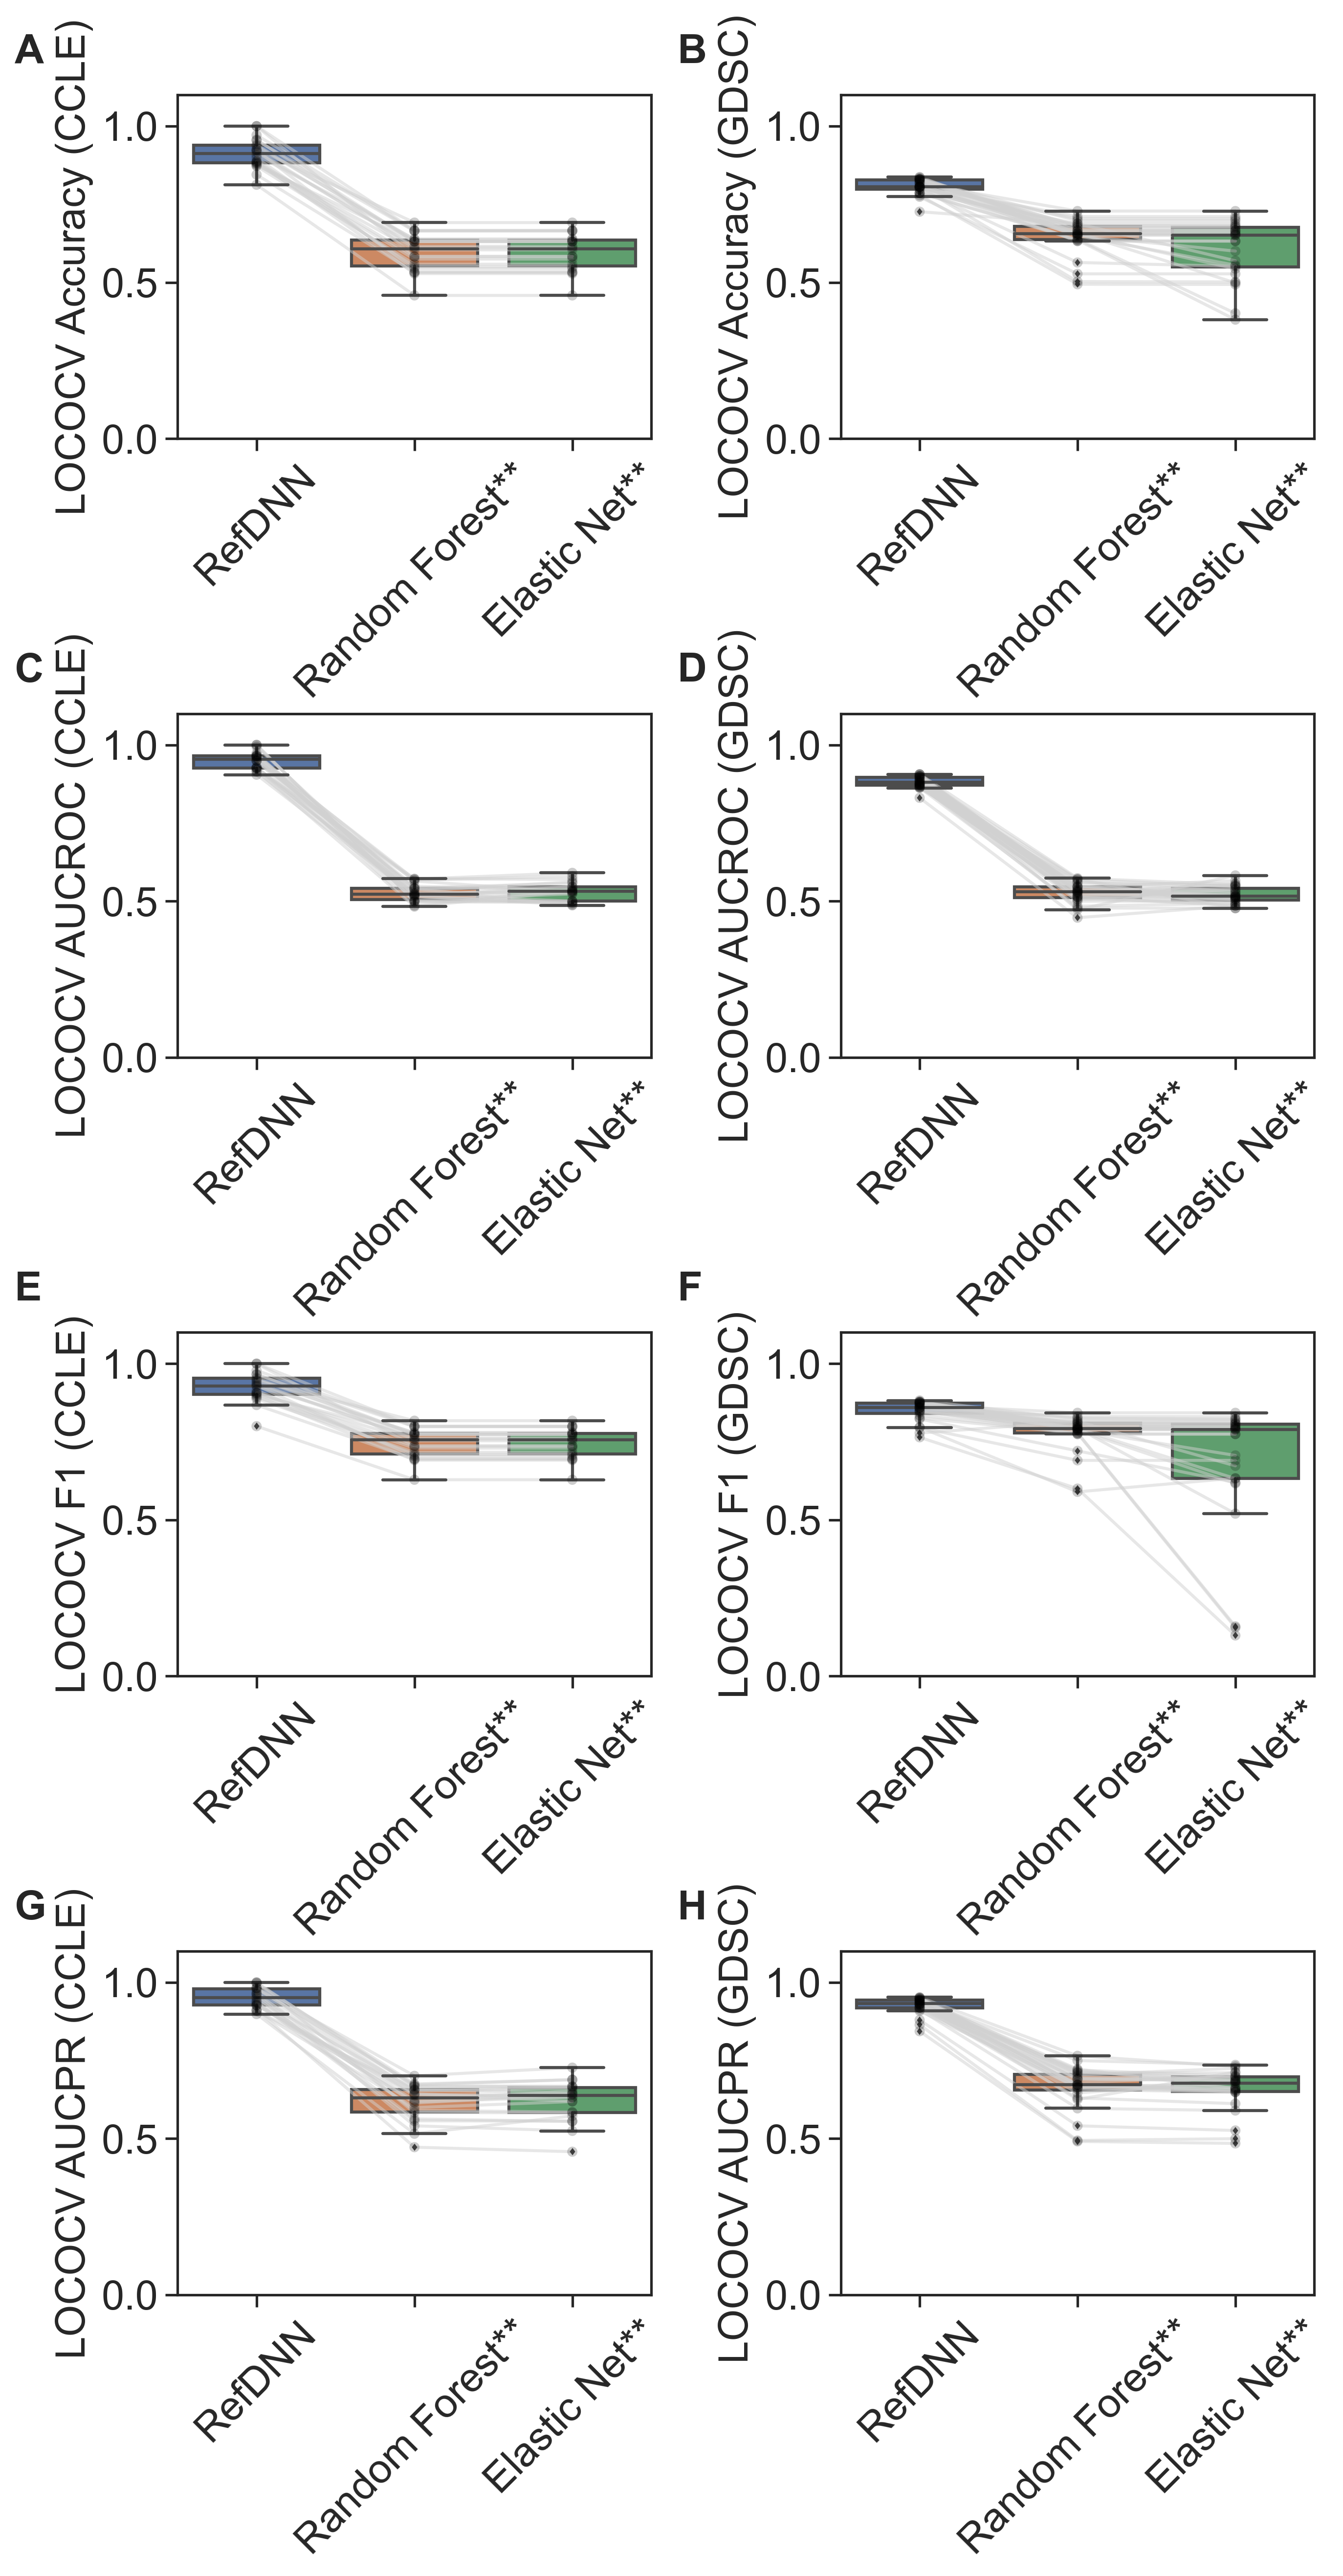

In [103]:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': False,
   'figure.figsize': [10,20]
   }
rcParams.update(params)
plt.subplots_adjust(left=0.125, bottom=0.05, right=0.9, top=0.8, wspace=0.4, hspace=0.8)

plt.subplot(4,2,1)
plot_data_final('Accuracy', 'CCLE', 1)
plt.subplot(4,2,2)
plot_data_final('Accuracy', 'GDSC', 2)
plt.subplot(4,2,3)
plot_data_final('AUCROC', 'CCLE', 3)
plt.subplot(4,2,4)
plot_data_final('AUCROC', 'GDSC', 4)
plt.subplot(4,2,5)
plot_data_final('F1', 'CCLE', 5)
plt.subplot(4,2,6)
plot_data_final('F1', 'GDSC', 6)
plt.subplot(4,2,7)
plot_data_final('AUCPR', 'CCLE', 7)
plt.subplot(4,2,8)
plot_data_final('AUCPR', 'GDSC', 8)

plt.savefig("analysis_output/figure2_LOCOCV.png", bbox_inches='tight');